In [323]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle
from matplotlib import colors
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency
from statsmodels.tools.eval_measures import aic, bic
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = Path('data/appartments_train.csv')

In [5]:
df = pd.read_csv(file_path, sep=',')

In [6]:
df.head()

unit_id  obj_type  dim_m2  n_rooms  floor_no  floor_max  \
0  a3a463617a5c0439  0d6c4dfc   45.89      2.0       1.0        4.0   
1  23a92531fcb238b4  0c238f18   27.64      1.0       1.0        2.0   
2  d158671401f9fc34  0d6c4dfc   62.18      2.0       1.0        2.0   
3  280aced4655b7a96  2a6d5c01   53.68      2.0       NaN        4.0   
4  2315fa621e746fe4  2a6d5c01   70.89      3.0       2.0        3.0   

   year_built  dist_centre  n_poi  dist_sch  ...     price_z  src_month  \
0      1999.0       13.496   11.0     0.541  ...   519626.21    2023-09   
1      1940.0        2.440   16.0     0.377  ...   162959.26    2024-04   
2      2000.0       10.284    8.0     0.391  ...  1167571.51    2023-10   
3      2018.0       10.589   30.0     0.729  ...   907071.16    2024-01   
4      2015.0        8.305    7.0     1.226  ...  1080383.19    2023-11   

   loc_code  market_volatility  infrastructure_quality  \
0  693f303c          501710.76                   14.02   
1  8d5a4f0c          147763.87                  110.55   
2  693f303c         1042847.59                   31.15   
3  693f303c          728839.39                    7.52   
4  693f303c         1263171.15                   11.20   

   neighborhood_crime_rate popularity_index green_space_ratio  \
0                    95.39            44.51             0.999   
1                    46.17            56.25             1.000   
2                    18.94            50.36             0.999   
3                    11.84            46.69             0.999   
4                    89.64            45.60             0.999   

  estimated_maintenance_cost global_economic_index  
0                      13.99            100.291946  
1                       7.59             91.315644  
2                      21.14             93.681619  
3                       7.91             94.192062  
4                       8.63             96.166051  

[5 rows x 34 columns]

In [9]:
columns_with_missings = df.columns[df.isnull().any()]

In [11]:
df[columns_with_missings].isnull().sum()

obj_type                   33820
floor_no                   27698
floor_max                   1921
year_built                 25713
dist_sch                     130
dist_clinic                  571
dist_post                    188
dist_kind                    163
dist_rest                    391
dist_uni                    4317
dist_pharma                  219
build_mat                  61999
cond_class                117058
has_lift                    7727
infrastructure_quality     25713
dtype: int64

In [13]:
print('Frequency counts for obj_type: \n')
print(df['obj_type'].value_counts(dropna=False))

Frequency counts for obj_type: 

obj_type
0d6c4dfc    73136
NaN         33820
2a6d5c01    26001
0c238f18    23497
Name: count, dtype: int64


In [21]:
# frequency tables for these columns
print('Frequency counts for floor_no: \n')
print(df['floor_no'].value_counts(dropna=False))

Frequency counts for floor_no: 

floor_no
1.0     30396
NaN     27698
3.0     27034
2.0     26939
4.0     19173
5.0      7361
6.0      4481
7.0      3521
8.0      2710
9.0      2336
10.0     2224
11.0      902
12.0      508
14.0      334
13.0      258
15.0      206
17.0      155
16.0       92
20.0       25
18.0       25
24.0       19
29.0       14
23.0       14
22.0       11
25.0        6
21.0        6
19.0        5
27.0        1
Name: count, dtype: int64


In [25]:
# frequency tables for these columns
print('Frequency counts for floor_max: \n')
print(df['floor_max'].value_counts(dropna=False))

Frequency counts for floor_max: 

floor_max
4.0     48935
3.0     28889
5.0     15378
10.0    14002
2.0     12042
6.0      8590
7.0      5662
8.0      4533
11.0     4199
1.0      3556
9.0      2049
NaN      1921
12.0     1712
15.0     1176
17.0      930
16.0      790
13.0      691
14.0      548
18.0      191
23.0      111
19.0      106
24.0       97
22.0       84
20.0       61
25.0       58
27.0       53
29.0       35
26.0       24
28.0       18
21.0       13
Name: count, dtype: int64


In [29]:
# frequency tables for these columns
print('Frequency counts for year_built: \n')
print(df['year_built'].value_counts(dropna=False))

Frequency counts for year_built: 

year_built
NaN       25713
2023.0     7528
2022.0     6263
1980.0     5432
1970.0     5293
          ...  
1884.0        2
1861.0        2
1855.0        2
1864.0        1
1866.0        1
Name: count, Length: 166, dtype: int64


In [33]:
# frequency tables for these columns
print('Frequency counts for dist_sch: \n')
print(df['dist_sch'].value_counts(dropna=False))

Frequency counts for dist_sch: 

dist_sch
0.155    403
0.145    401
0.179    399
0.205    394
0.174    392
        ... 
1.608      1
3.372      1
3.250      1
2.618      1
2.908      1
Name: count, Length: 3613, dtype: int64


In [37]:
# frequency tables for these columns
print('Frequency counts for dist_clinic: \n')
print(df['dist_clinic'].value_counts(dropna=False))

Frequency counts for dist_clinic: 

dist_clinic
NaN      571
0.303    190
0.299    181
0.271    174
0.294    172
        ... 
4.425      1
4.691      1
4.962      1
4.742      1
4.975      1
Name: count, Length: 4909, dtype: int64


In [41]:
# frequency tables for these columns
print('Frequency counts for dist_post: \n')
print(df['dist_post'].value_counts(dropna=False))

Frequency counts for dist_post: 

dist_post
0.261    304
0.245    293
0.284    289
0.209    285
0.252    284
        ... 
4.431      1
2.802      1
5.045      1
3.602      1
2.081      1
Name: count, Length: 3801, dtype: int64


In [45]:
# frequency tables for these columns
print('Frequency counts for dist_kind: \n')
print(df['dist_kind'].value_counts(dropna=False))

Frequency counts for dist_kind: 

dist_kind
0.161    442
0.158    441
0.112    435
0.173    433
0.141    433
        ... 
2.314      1
4.366      1
2.661      1
3.959      1
3.646      1
Name: count, Length: 3574, dtype: int64


In [49]:
# frequency tables for these columns
print('Frequency counts for dist_rest: \n')
print(df['dist_rest'].value_counts(dropna=False))

Frequency counts for dist_rest: 

dist_rest
0.061    480
0.065    475
0.068    470
0.066    470
0.070    463
        ... 
2.420      1
3.823      1
3.027      1
2.071      1
2.856      1
Name: count, Length: 3557, dtype: int64


In [53]:
# frequency tables for these columns
print('Frequency counts for dist_uni: \n')
print(df['dist_uni'].value_counts(dropna=False))

Frequency counts for dist_uni: 

dist_uni
NaN      4317
0.485     124
0.588     110
0.523     110
0.323     109
         ... 
5.694       1
5.744       1
5.603       1
5.217       1
5.310       1
Name: count, Length: 5539, dtype: int64


In [57]:
# frequency tables for these columns
print('Frequency counts for dist_pharma: \n')
print(df['dist_pharma'].value_counts(dropna=False))

Frequency counts for dist_pharma: 

dist_pharma
0.167    486
0.133    472
0.165    464
0.156    463
0.163    462
        ... 
3.589      1
4.605      1
2.716      1
4.061      1
3.973      1
Name: count, Length: 3583, dtype: int64


In [61]:
# frequency tables for these columns
print('Frequency counts for build_mat: \n')
print(df['build_mat'].value_counts(dropna=False))

Frequency counts for build_mat: 

build_mat
7ceffe3b    73414
NaN         61999
7f8c00f9    21041
Name: count, dtype: int64


In [65]:
# frequency tables for these columns
print('Frequency counts for cond_class: \n')
print(df['cond_class'].value_counts(dropna=False))

Frequency counts for cond_class: 

cond_class
NaN         117058
a2881958     22298
53cced8d     17098
Name: count, dtype: int64


In [69]:
# frequency tables for these columns
print('Frequency counts for has_lift: \n')
print(df['has_lift'].value_counts(dropna=False))

Frequency counts for has_lift: 

has_lift
no     74680
yes    74047
NaN     7727
Name: count, dtype: int64


In [75]:
# frequency tables for these columns
print('Frequency counts for infrastructure_quality: \n')
print(df['infrastructure_quality'].value_counts(dropna=False))

Frequency counts for infrastructure_quality: 

infrastructure_quality
NaN       25713
0.00       1784
1.44        124
1.39        124
1.08        119
          ...  
107.39        1
169.58        1
135.58        1
137.15        1
170.64        1
Name: count, Length: 15191, dtype: int64


## Fillna with description provided and Data Frequencies

In [15]:
df_copy = df.copy() # just for insurance of our code

In [17]:
# obj_type - Unknown
df.obj_type.fillna('Unknown', inplace = True)
# floor_no - -1 (Unknown)
df.floor_no.fillna(-1, inplace = True)
# floor_max - median()
df.floor_max.fillna(df.floor_max.median(), inplace=True)
# year_built - median()
df.year_built.fillna(df.year_built.median(), inplace=True)
# dist_sch - median()
df.dist_sch.fillna(df.dist_sch.median(), inplace=True)
# dist_clinic - median()
df.dist_clinic.fillna(df.dist_clinic.median(), inplace=True)
# dist_post - median()
df.dist_post.fillna(df.dist_post.median(), inplace=True)
# dist_kind - median()
df.dist_kind.fillna(df.dist_kind.median(), inplace=True)
# dist_rest - median()
df.dist_rest.fillna(df.dist_rest.median(), inplace=True)
# dist_uni - median()
df.dist_uni.fillna(df.dist_uni.median(), inplace=True)
# dist_pharma - median()
df.dist_pharma.fillna(df.dist_pharma.median(), inplace=True)
# build_mat - Unknown
df.build_mat.fillna('Unknown', inplace=True)
# cond_class - Unknown
df.cond_class.fillna('Unknown', inplace=True)
# has_lift - random-choice 0.5
nan_mask = df['has_lift'].isna()
n_nan = nan_mask.sum()
df.loc[nan_mask, 'has_lift'] = np.random.choice(['yes', 'no'], size=n_nan, p=[0.5, 0.5])
# infrastructure_quality - median()
df.infrastructure_quality.fillna(df.infrastructure_quality.median(), inplace=True)

In [19]:
# checking if handling missing values worked or not
for col in columns_with_missings:
    print(f'Frequency table for {col}: ')
    print(df[col].value_counts(dropna=False))

Frequency table for obj_type: 
obj_type
0d6c4dfc    73136
Unknown     33820
2a6d5c01    26001
0c238f18    23497
Name: count, dtype: int64
Frequency table for floor_no: 
floor_no
 1.0     30396
-1.0     27698
 3.0     27034
 2.0     26939
 4.0     19173
 5.0      7361
 6.0      4481
 7.0      3521
 8.0      2710
 9.0      2336
 10.0     2224
 11.0      902
 12.0      508
 14.0      334
 13.0      258
 15.0      206
 17.0      155
 16.0       92
 20.0       25
 18.0       25
 24.0       19
 29.0       14
 23.0       14
 22.0       11
 25.0        6
 21.0        6
 19.0        5
 27.0        1
Name: count, dtype: int64
Frequency table for floor_max: 
floor_max
4.0     50856
3.0     28889
5.0     15378
10.0    14002
2.0     12042
6.0      8590
7.0      5662
8.0      4533
11.0     4199
1.0      3556
9.0      2049
12.0     1712
15.0     1176
17.0      930
16.0      790
13.0      691
14.0      548
18.0      191
23.0      111
19.0      106
24.0       97
22.0       84
20.0       61
25.0       5

In [23]:
df_categorical_variables = df.select_dtypes('object').columns
df_numerical_variables = df.select_dtypes(include=[np.number]).columns

In [109]:
df_numerical_variables.to_list()

['dim_m2',
 'n_rooms',
 'floor_no',
 'floor_max',
 'year_built',
 'dist_centre',
 'n_poi',
 'dist_sch',
 'dist_clinic',
 'dist_post',
 'dist_kind',
 'dist_rest',
 'dist_uni',
 'dist_pharma',
 'price_z',
 'market_volatility',
 'infrastructure_quality',
 'neighborhood_crime_rate',
 'popularity_index',
 'green_space_ratio',
 'estimated_maintenance_cost',
 'global_economic_index']

### Frequency table for Categorical Variables

In [25]:
for var in df_categorical_variables:
    value_counts = df[var].value_counts()
    print(df[var].value_counts(dropna=False))

unit_id
ff92f050e0b9869f    11
7a0672f5aad151a9    11
5654e744a81ef567    11
ee776b558f9a2ee4    11
861fc8be4376bcd0    11
                    ..
974cc1793c313a48     1
d13737d6dc9b4cf3     1
b86e1b998f59340c     1
e86dedf1b6c9c38d     1
53618f0f04ae1dbd     1
Name: count, Length: 82491, dtype: int64
obj_type
0d6c4dfc    73136
Unknown     33820
2a6d5c01    26001
0c238f18    23497
Name: count, dtype: int64
own_type
12631efb    140897
bfb8fe10     15548
4e625087         9
Name: count, dtype: int64
build_mat
7ceffe3b    73414
Unknown     61999
7f8c00f9    21041
Name: count, dtype: int64
cond_class
Unknown     117058
a2881958     22298
53cced8d     17098
Name: count, dtype: int64
has_park
no     113938
yes     42516
Name: count, dtype: int64
has_balcony
yes    89655
no     66799
Name: count, dtype: int64
has_lift
no     78489
yes    77965
Name: count, dtype: int64
has_sec
no     138878
yes     17576
Name: count, dtype: int64
has_store
no     88578
yes    67876
Name: count, dtype: int64
src

In [27]:
categorical_variables_temp = df_categorical_variables.tolist()

In [29]:
categorical_variables_temp.remove('unit_id')

In [33]:
for var in categorical_variables_temp:
    value_counts = df[var].value_counts()
    levels_to_replace = value_counts[value_counts <= 150].index 
    df[var] = df[var].replace(levels_to_replace, "Other")

In [35]:
for var in df_categorical_variables:
    value_counts = df[var].value_counts()
    print('\n')
    print(df[var].value_counts(dropna=False))



unit_id
ff92f050e0b9869f    11
7a0672f5aad151a9    11
5654e744a81ef567    11
ee776b558f9a2ee4    11
861fc8be4376bcd0    11
                    ..
974cc1793c313a48     1
d13737d6dc9b4cf3     1
b86e1b998f59340c     1
e86dedf1b6c9c38d     1
53618f0f04ae1dbd     1
Name: count, Length: 82491, dtype: int64


obj_type
0d6c4dfc    73136
Unknown     33820
2a6d5c01    26001
0c238f18    23497
Name: count, dtype: int64


own_type
12631efb    140897
bfb8fe10     15548
Other            9
Name: count, dtype: int64


build_mat
7ceffe3b    73414
Unknown     61999
7f8c00f9    21041
Name: count, dtype: int64


cond_class
Unknown     117058
a2881958     22298
53cced8d     17098
Name: count, dtype: int64


has_park
no     113938
yes     42516
Name: count, dtype: int64


has_balcony
yes    89655
no     66799
Name: count, dtype: int64


has_lift
no     78489
yes    77965
Name: count, dtype: int64


has_sec
no     138878
yes     17576
Name: count, dtype: int64


has_store
no     88578
yes    67876
Name: cou

## Near Zero Variance

In [37]:
def near_zero_variance(df, freq_cut = 95/5, unique_cut = 10):
    results = []
    for col in df.columns:
        counts = df[col].value_counts()
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf') # only one unique value

        # calculate unique_ratio
        unique_ratio = len(counts) / len(df)
        # determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)
        # append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })
    # convert results to a DataFrame
    results_df = pd.DataFrame(results)
    # sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
    results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], 
                                    ascending=[False, True])
    return results_df

In [39]:
# apply it to the dataset
df_nzv = near_zero_variance(df, freq_cut = 90/10, unique_cut = 1500)
df_nzv[(df_nzv['low_unique_ratio']==1) & (df_nzv['high_freq_ratio']==1)]

variable  freq_ratio  unique_ratio  high_freq_ratio  \
14                dist_uni   35.306452      0.035397                1   
28  infrastructure_quality   14.420964      0.097089                1   
16                own_type    9.062066      0.000019                1   

    low_unique_ratio  
14                 1  
28                 1  
16                 1

In [41]:
df.drop(['unit_id', 'loc_code'], axis=1, inplace=True)

## Train - Test Split

In [47]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=123)

In [51]:
categorical_variables = df_train.select_dtypes('object').columns
numerical_variables = df_train.select_dtypes(include=[np.number]).columns

<Axes: xlabel='price_z', ylabel='Count'>

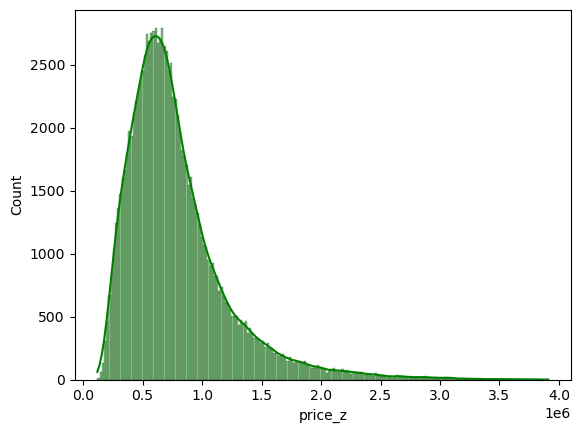

In [55]:
sns.histplot(df_train.price_z, kde=True, color='green')

<Axes: xlabel='price_z', ylabel='Count'>

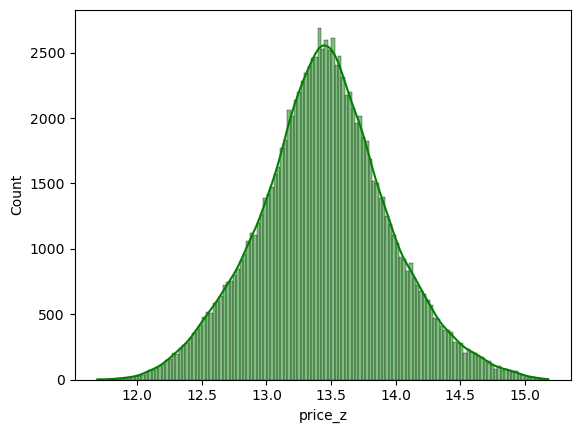

In [57]:
price_z_log = np.log(df_train.price_z + 1)
sns.histplot(price_z_log, kde=True , color = 'green')

In [59]:
train_numeric_correlations = df_train[numerical_variables].corr(method='pearson')

In [61]:
train_numeric_correlations

dim_m2   n_rooms  floor_no  floor_max  \
dim_m2                      1.000000  0.764537 -0.029335  -0.121912   
n_rooms                     0.764537  1.000000 -0.006036  -0.076878   
floor_no                   -0.029335 -0.006036  1.000000   0.604030   
floor_max                  -0.121912 -0.076878  0.604030   1.000000   
year_built                 -0.020324 -0.003179  0.047234   0.110250   
dist_centre                 0.042546  0.050752 -0.038025  -0.037448   
n_poi                       0.033470  0.000909  0.052238   0.040154   
dist_sch                    0.062114  0.066816 -0.097000  -0.138892   
dist_clinic                 0.012465  0.038021 -0.121595  -0.174913   
dist_post                   0.052280  0.059384 -0.074328  -0.101168   
dist_kind                   0.063996  0.062017 -0.085309  -0.127293   
dist_rest                   0.030033  0.050137 -0.084594  -0.125708   
dist_uni                    0.027655  0.042237 -0.062879  -0.074689   
dist_pharma                 0.053253  0.061917 -0.097232  -0.134258   
price_z                     0.564921  0.476021  0.045982   0.034015   
market_volatility           0.549665  0.463233  0.046570   0.034552   
infrastructure_quality      0.023859  0.007625 -0.042383  -0.100291   
neighborhood_crime_rate    -0.000242 -0.000854 -0.001636   0.002039   
popularity_index            0.002196 -0.000319 -0.003535  -0.003872   
green_space_ratio          -0.040872 -0.045665  0.024121   0.019780   
estimated_maintenance_cost  0.692822  0.528697 -0.019839  -0.087139   
global_economic_index      -0.018825 -0.014060  0.009550   0.012767   

                            year_built  dist_centre     n_poi  dist_sch  \
dim_m2                       -0.020324     0.042546  0.033470  0.062114   
n_rooms                      -0.003179     0.050752  0.000909  0.066816   
floor_no                      0.047234    -0.038025  0.052238 -0.097000   
floor_max                     0.110250    -0.037448  0.040154 -0.138892   
year_built                    1.000000     0.318033 -0.334934  0.234459   
dist_centre                   0.318033     1.000000 -0.446667  0.279715   
n_poi                        -0.334934    -0.446667  1.000000 -0.302262   
dist_sch                      0.234459     0.279715 -0.302262  1.000000   
dist_clinic                   0.223729     0.408350 -0.363202  0.544029   
dist_post                     0.209219     0.252969 -0.316109  0.740851   
dist_kind                     0.106003     0.127948 -0.204428  0.758691   
dist_rest                     0.149241     0.223086 -0.334572  0.751539   
dist_uni                      0.311952     0.490564 -0.424803  0.324884   
dist_pharma                   0.176272     0.242590 -0.294604  0.782888   
price_z                       0.107463     0.082181  0.174430 -0.001188   
market_volatility             0.104513     0.080259  0.169420 -0.001128   
infrastructure_quality       -0.918349    -0.288360  0.306369 -0.213440   
neighborhood_crime_rate      -0.002110    -0.004851  0.002791 -0.002525   
popularity_index             -0.002100     0.006768 -0.000507  0.000139   
green_space_ratio            -0.271325    -0.826105  0.309959 -0.275975   
estimated_maintenance_cost   -0.016927     0.029245  0.020096  0.041031   
global_economic_index        -0.000295     0.011843 -0.004644  0.000275   

                            dist_clinic  dist_post  ...  dist_uni  \
dim_m2                         0.012465   0.052280  ...  0.027655   
n_rooms                        0.038021   0.059384  ...  0.042237   
floor_no                      -0.121595  -0.074328  ... -0.062879   
floor_max                     -0.174913  -0.101168  ... -0.074689   
year_built                     0.223729   0.209219  ...  0.311952   
dist_centre                    0.408350   0.252969  ...  0.490564   
n_poi                         -0.363202  -0.316109  ... -0.424803   
dist_sch                       0.544029   0.740851  ...  0.324884   
dist_clinic                    1.000000   0.48020

<Axes: >

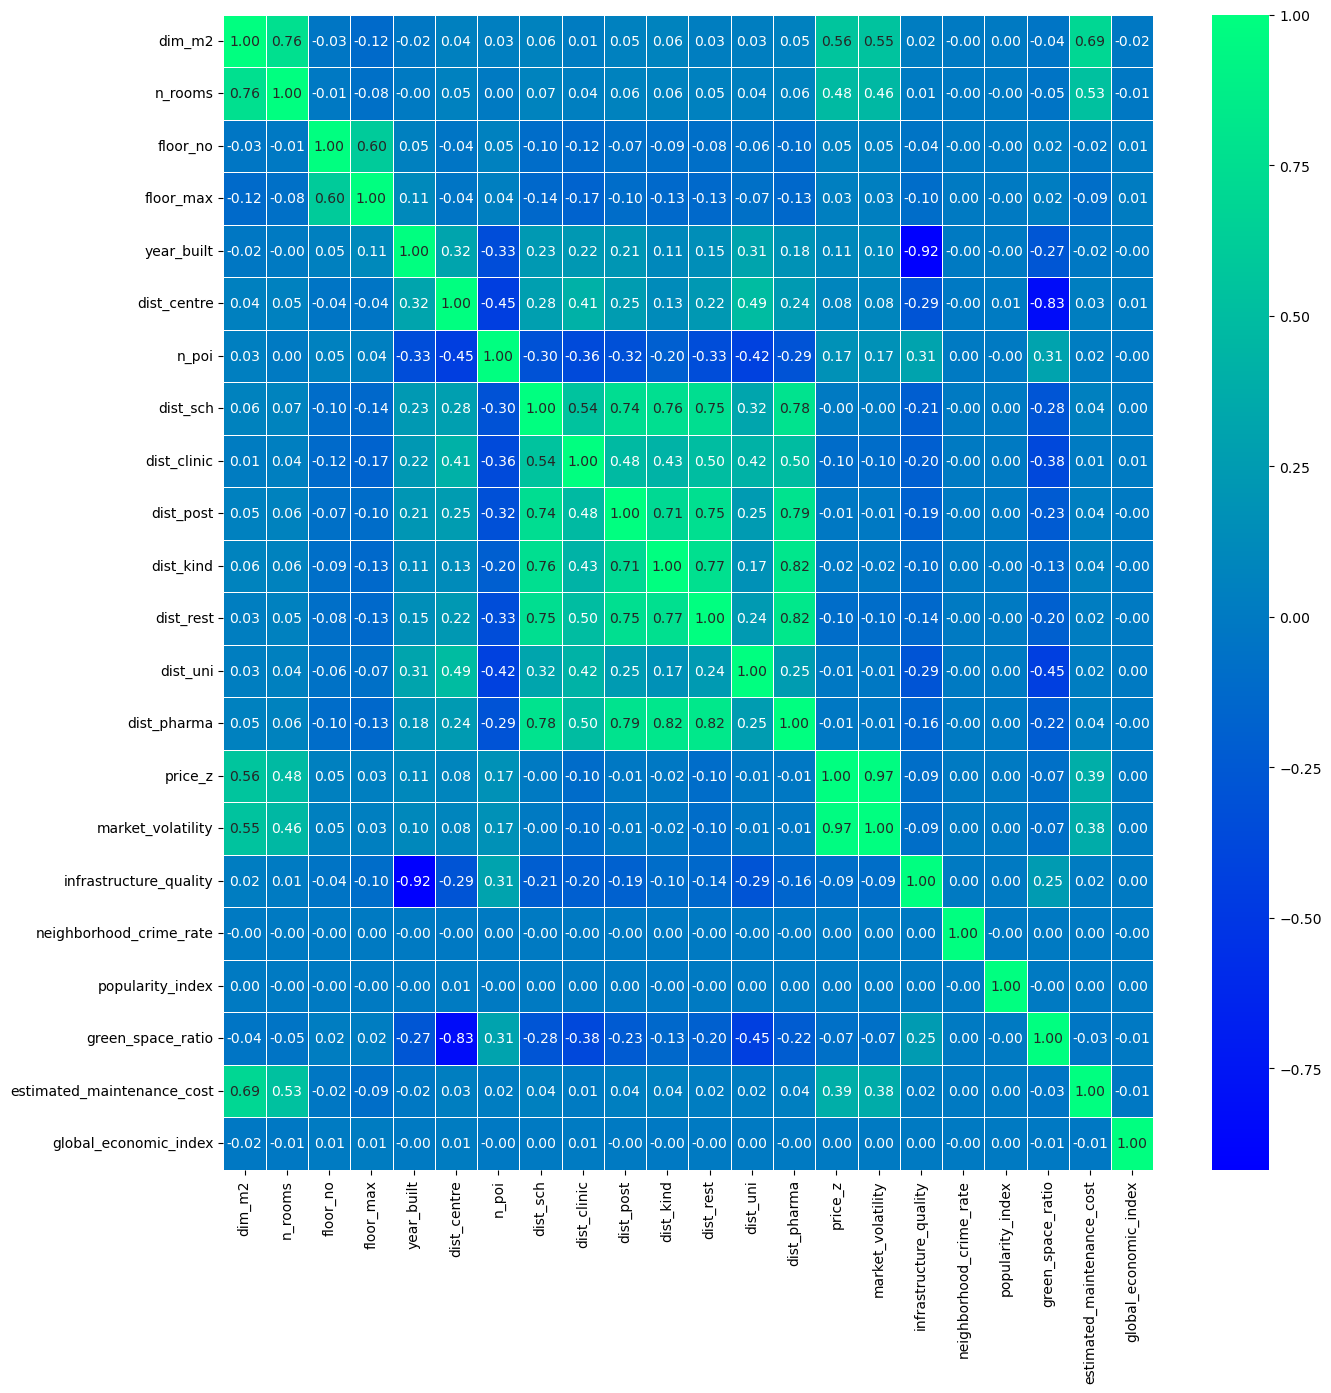

In [67]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_numeric_correlations,
            annot = True, 
            cmap = 'winter', 
            fmt = '.2f',
            linewidths = 0.5)

In [69]:
mask = np.triu(np.ones_like(train_numeric_correlations, dtype=bool))
correlation_with_price_z = train_numeric_correlations.price_z.sort_values(ascending=False)
ordered_columns = correlation_with_price_z.index
train_numeric_correlations=train_numeric_correlations[ordered_columns].loc[ordered_columns]

<Axes: >

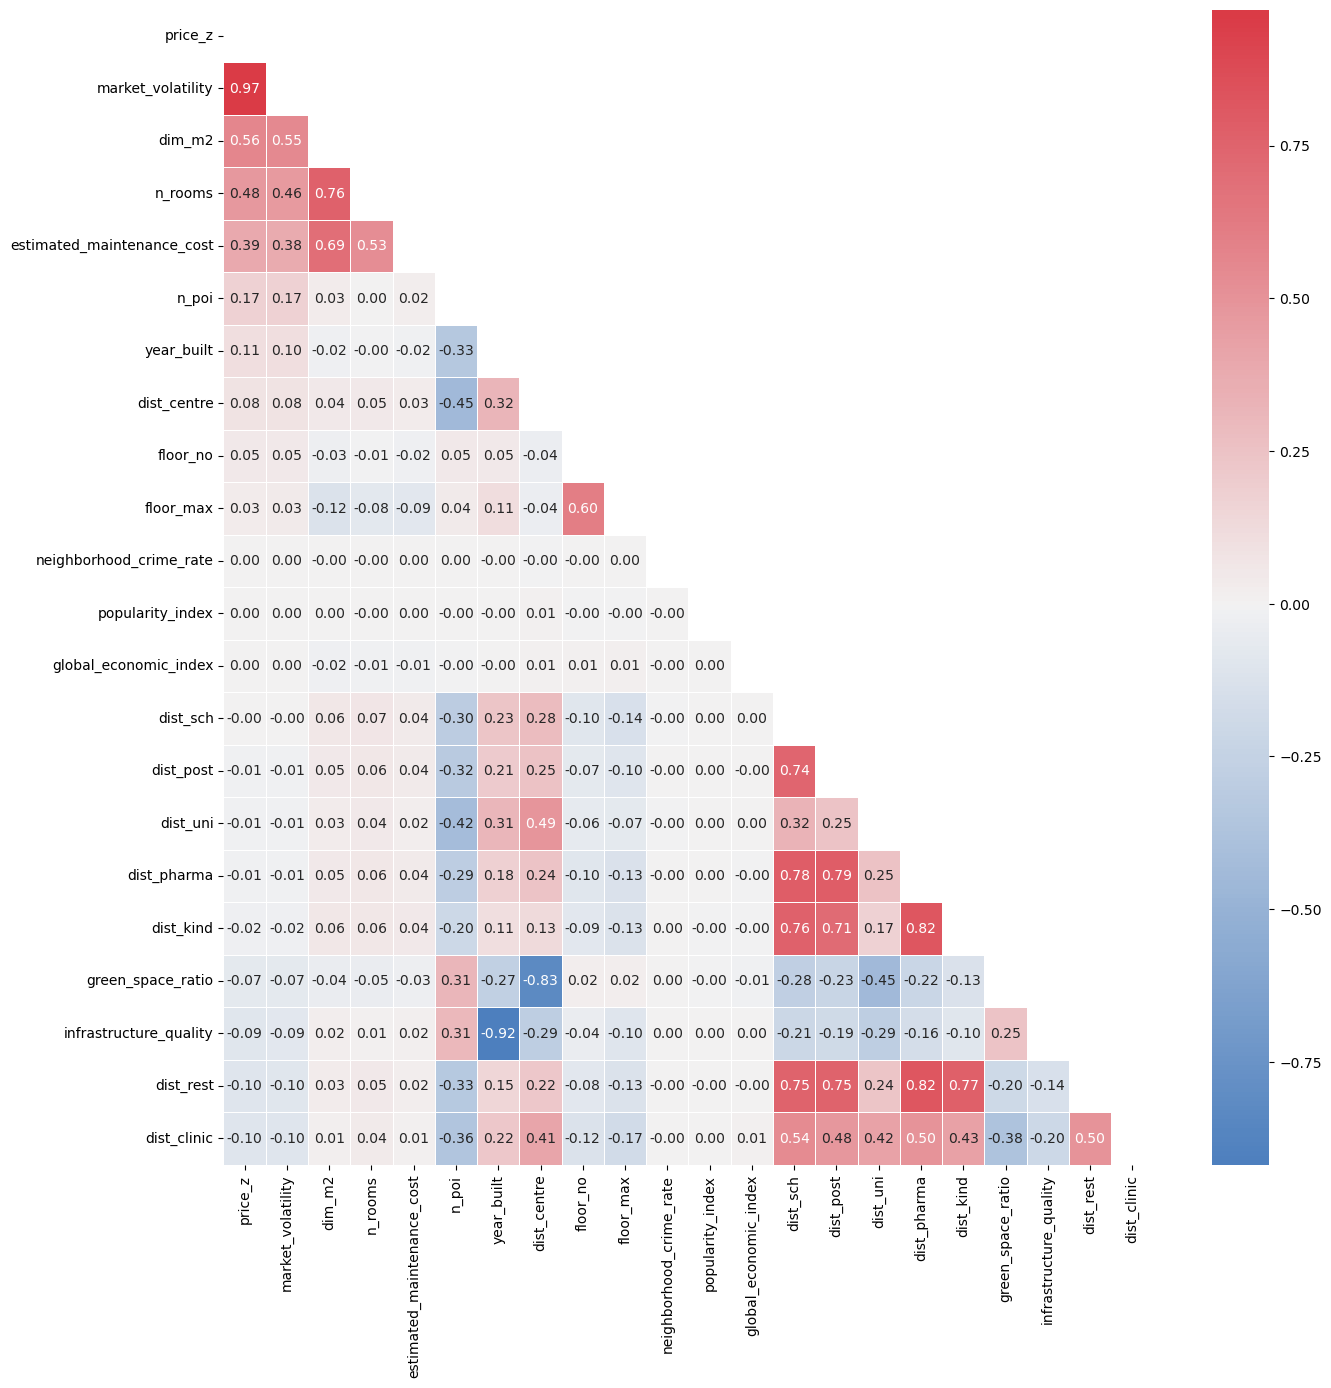

In [71]:
my_cmap = sns.diverging_palette(250, 10, as_cmap = True)
plt.figure(figsize=(15, 15))
sns.heatmap(train_numeric_correlations,
           annot = True,
           cmap = my_cmap,
           mask = mask,
           fmt = '.2f',
           linewidths = 0.5,
           # this argument ensures that the color map is centered at 0, 
           # meaning 0 will be displayed in white
           center = 0)

<Axes: >

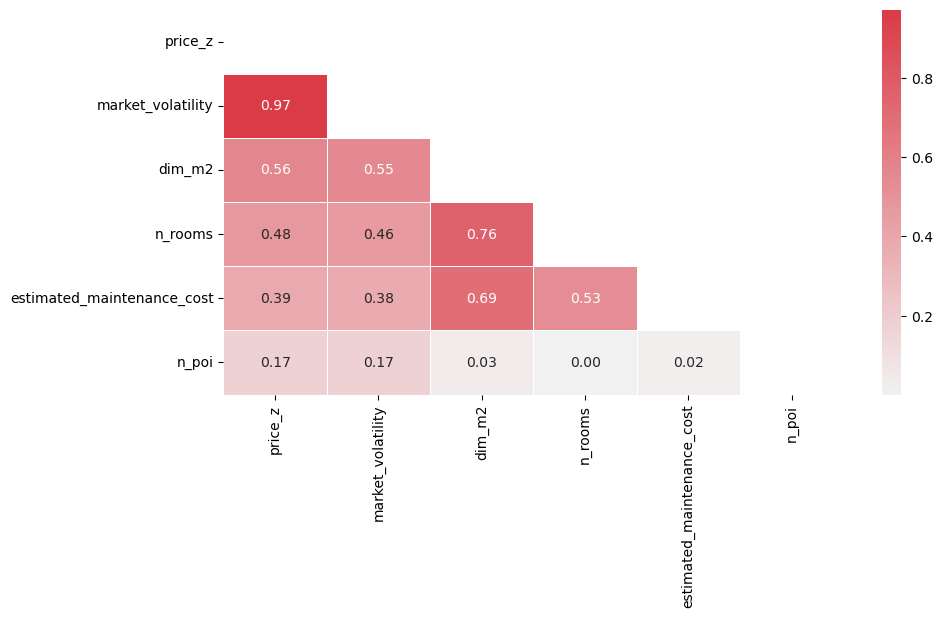

In [73]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_numeric_correlations.iloc[:6, :6],
            annot = True,
            cmap = my_cmap,
            mask = mask[:6, :6],
            fmt = '.2f',
            linewidths = 0.5,
            center = 0)

In [75]:
simple_model = smf.ols('price_z ~ market_volatility + dim_m2 + n_rooms + n_poi + dist_centre', 
                      data = df_train).fit()

In [77]:
print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                price_z   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 3.966e+05
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        20:15:40   Log-Likelihood:            -1.4146e+06
No. Observations:              109517   AIC:                         2.829e+06
Df Residuals:                  109511   BIC:                         2.829e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3738.5433   1118.82

In [79]:
X = df_train[['market_volatility', 'dim_m2', 'n_rooms', 'n_poi','dist_centre']]
y = df_train['price_z']

In [81]:
df_model1 = LinearRegression()

In [83]:
df_model1.fit(X, y)

LinearRegression()

In [85]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [87]:
y_pred = df_model1.predict(X)
# y_pred = simple_model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
medae = median_absolute_error(y, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 74462.48948286353
Root Mean Squared Error: 98509.8849201634
Median Absolute Error: 60352.45586760971


In [360]:
categorical_variables

Index(['obj_type', 'own_type', 'build_mat', 'cond_class', 'has_park',
       'has_balcony', 'has_lift', 'has_sec', 'has_store', 'src_month'],
      dtype='object')

In [93]:
model = smf.ols('price_z ~ C(has_park)', data = df_train).fit()

In [97]:
def anova_for_categorical_vars(dataset, dependent_var, categorical_vars):
    results = []
    for var in categorical_vars:
        model = smf.ols(f'{dependent_var} ~ C({var})', data = dataset).fit()
        anova_table = anova_lm(model)
        f_statistic = anova_table['F'].iloc[0]
        p_value = anova_table['PR(>F)'].iloc[0]
        results.append([var, f_statistic, p_value])
        
    anova_results_df = pd.DataFrame(results,
                                   columns = ['Variable', 'F-statistic', 'p-values'])
    anova_results_df = anova_results_df.sort_values(by = 'F-statistic', ascending = False)
    
    return anova_results_df

In [99]:
df_anova_results = anova_for_categorical_vars(df_train,
                                                  'price_z',
                                                  categorical_variables)

In [103]:
df_anova_results.head()

Variable  F-statistic  p-values
6   has_lift  3958.505681       0.0
0   obj_type  3478.233472       0.0
2  build_mat  3294.000925       0.0
8  has_store  2982.353047       0.0
7    has_sec  2076.741288       0.0

In [105]:
df_train.drop(['build_mat', 'cond_class'], axis=1, inplace=True)
df_test.drop(['build_mat', 'cond_class'], axis=1, inplace=True)

In [107]:
# based on missing values, need to drop some variables
columns_to_drop = ['floor_no', 'year_built', 'dist_clinic',
                   'dist_uni', 'infrastructure_quality']
columns_to_reconsider = ['dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma']

In [109]:
df_train.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [111]:
categorical_variables = df_train.select_dtypes('object').columns
numerical_variables = df_train.select_dtypes(include=[np.number]).columns

In [113]:
train_numeric_correlations = df_train[numerical_variables].corr(method='pearson')

In [115]:
mask = np.triu(np.ones_like(train_numeric_correlations, dtype=bool))
correlation_with_price_z = train_numeric_correlations.price_z.sort_values(ascending=False)
ordered_columns = correlation_with_price_z.index
train_numeric_correlations=train_numeric_correlations[ordered_columns].loc[ordered_columns]

<Axes: >

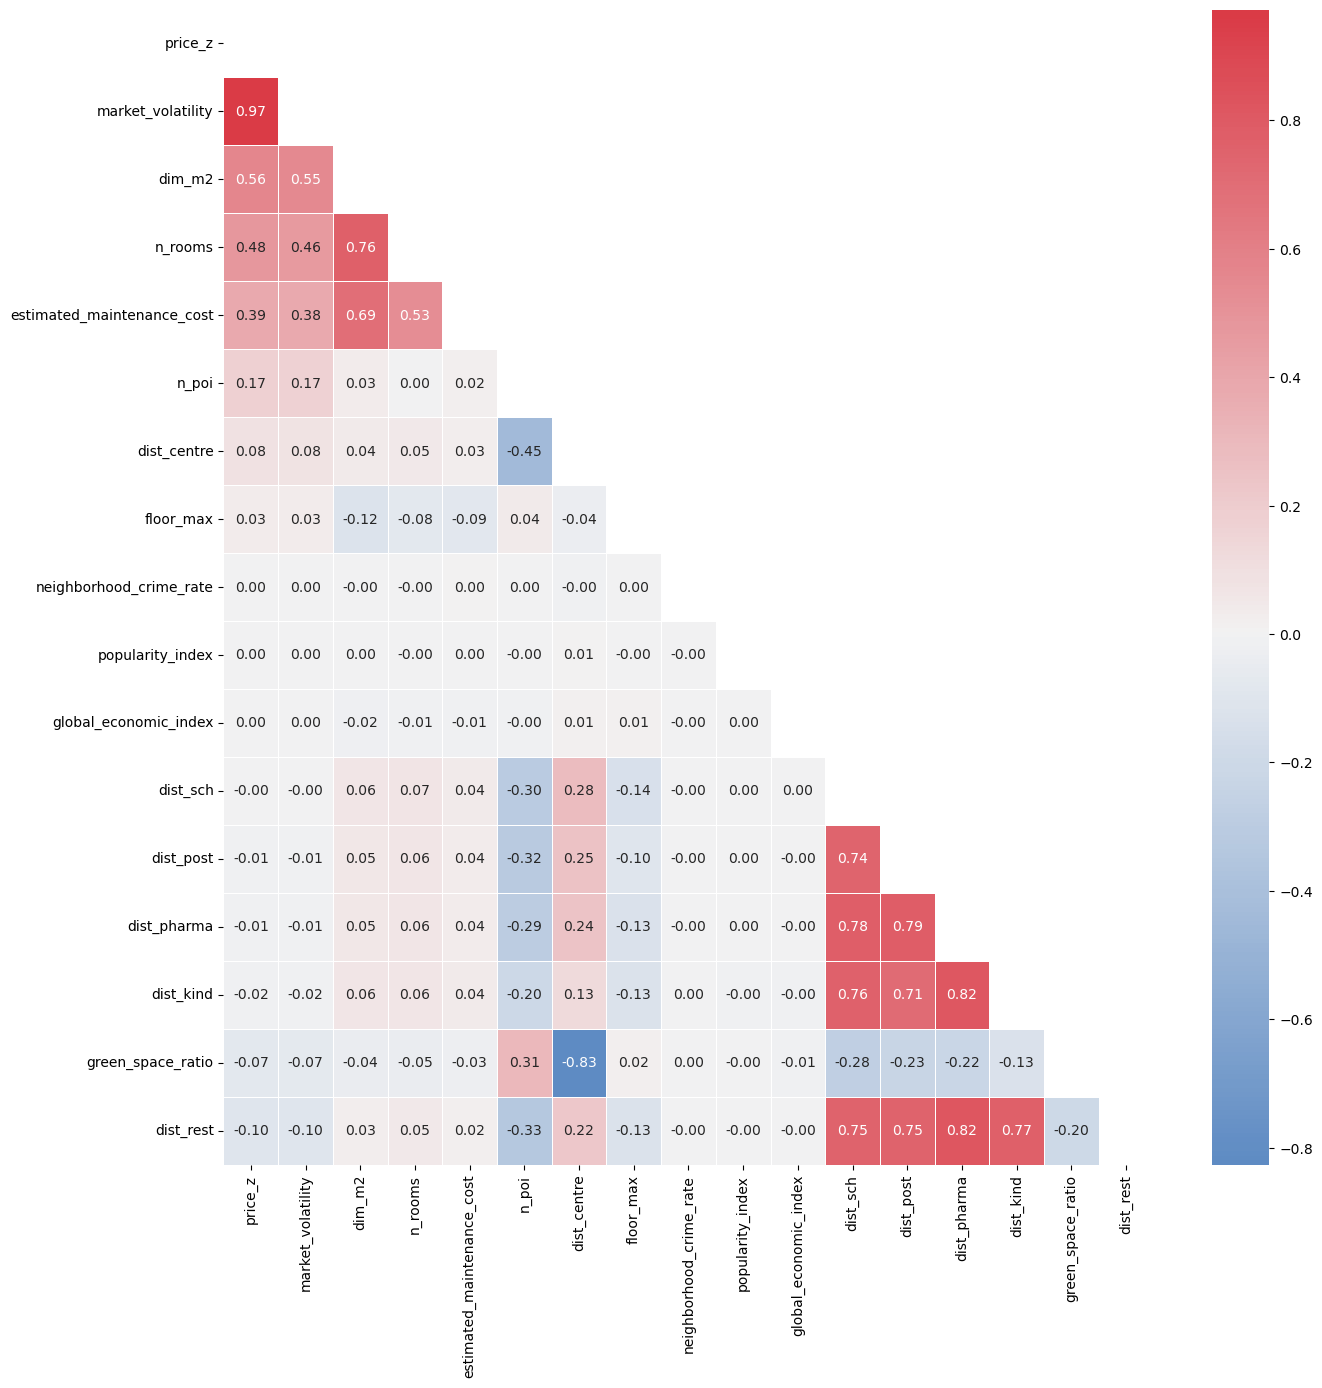

In [117]:
my_cmap = sns.diverging_palette(250, 10, as_cmap = True)
plt.figure(figsize=(15, 15))
sns.heatmap(train_numeric_correlations,
           annot = True,
           cmap = my_cmap,
           mask = mask,
           fmt = '.2f',
           linewidths = 0.5,
           # this argument ensures that the color map is centered at 0, 
           # meaning 0 will be displayed in white
           center = 0)

In [119]:
df_anova_results = anova_for_categorical_vars(df_train,
                                                  'price_z',
                                                  categorical_variables)

In [121]:
df_anova_results.head()

Variable  F-statistic  p-values
4   has_lift  3958.505681       0.0
0   obj_type  3478.233472       0.0
6  has_store  2982.353047       0.0
5    has_sec  2076.741288       0.0
2   has_park  2017.805478       0.0

In [123]:
X = df_train[['market_volatility', 'dim_m2', 'n_rooms', 'n_poi','dist_centre',
             'floor_max', 'green_space_ratio', 'dist_rest']]
y = df_train['price_z']

In [125]:
df_model1 = LinearRegression()

In [127]:
df_model1.fit(X, y)

LinearRegression()

In [129]:
y_pred = df_model1.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
medae = median_absolute_error(y, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 74402.53626136952
Root Mean Squared Error: 98422.88197267344
Median Absolute Error: 60254.30418995605


In [131]:
categorical_variables_with_3_levels = ['obj_type', 'own_type']
categorical_variables_with_2 = categorical_variables.to_list()
categorical_variables_with_2.remove('obj_type')
categorical_variables_with_2.remove('own_type')
print(categorical_variables_with_3_levels)
print(categorical_variables_with_2)

['obj_type', 'own_type']
['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store', 'src_month']


In [133]:
encoded_train = df_train.copy()
encoded_test = df_test.copy()

In [135]:
encoded_train.head()

obj_type  dim_m2  n_rooms  floor_max  dist_centre  n_poi  dist_sch  \
74543   0d6c4dfc   42.90      2.0       10.0        2.896   17.0     0.299   
51872   0d6c4dfc   72.13      3.0        4.0        6.752    2.0     0.816   
42590   0d6c4dfc   89.32      3.0        2.0        9.631    3.0     2.065   
150852  0d6c4dfc   33.41      2.0       10.0        4.908   25.0     0.133   
70390   0d6c4dfc   48.31      2.0        3.0        1.328    7.0     0.387   

        dist_post  dist_kind  dist_rest  ...  has_sec has_store     price_z  \
74543       1.073      0.248      0.053  ...       no        no   284129.09   
51872       0.971      0.203      0.476  ...      yes       yes   736237.49   
42590       0.776      0.270      0.325  ...       no        no  1254791.25   
150852      0.348      0.168      0.217  ...       no       yes   679041.39   
70390       0.368      0.632      0.604  ...       no        no   448694.65   

       src_month market_volatility neighborhood_crime_rate popularity_index  \
74543    2023-12         276687.57                   88.52            42.26   
51872    2024-01         619632.07                   41.65            42.46   
42590    2024-06        1110908.99                    6.94            56.30   
150852   2023-08         700056.11                   54.34            51.70   
70390    2023-10         368624.45                   63.18            53.33   

        green_space_ratio estimated_maintenance_cost  global_economic_index  
74543               1.000                      21.15              95.039561  
51872               0.999                       8.72              92.706904  
42590               0.999                      20.09             108.450140  
150852              1.000                      13.18             105.519154  
70390               1.000                       8.50              93.401299  

[5 rows x 25 columns]

In [137]:
# train - 2 levels
encoded_train = pd.get_dummies(encoded_train,
                               columns = categorical_variables_with_2,
                               drop_first = True,
                               dtype = int
                               )
# test - 2 levels
encoded_test = pd.get_dummies(encoded_test,
                              columns = categorical_variables_with_2,
                              drop_first = True,
                              dtype = int
                              )


In [139]:
# train - >3 levels
encoded_train = pd.get_dummies(encoded_train,
                               columns = categorical_variables_with_3_levels,
                               drop_first = False,
                               dtype = int
                               )
# test - >3 levels
encoded_test = pd.get_dummies(encoded_test,
                              columns = categorical_variables_with_3_levels,
                              drop_first = False,
                              dtype = int
                              )

In [141]:
encoded_train.head()

dim_m2  n_rooms  floor_max  dist_centre  n_poi  dist_sch  dist_post  \
74543    42.90      2.0       10.0        2.896   17.0     0.299      1.073   
51872    72.13      3.0        4.0        6.752    2.0     0.816      0.971   
42590    89.32      3.0        2.0        9.631    3.0     2.065      0.776   
150852   33.41      2.0       10.0        4.908   25.0     0.133      0.348   
70390    48.31      2.0        3.0        1.328    7.0     0.387      0.368   

        dist_kind  dist_rest  dist_pharma  ...  src_month_2024-04  \
74543       0.248      0.053        0.123  ...                  0   
51872       0.203      0.476        0.485  ...                  0   
42590       0.270      0.325        0.969  ...                  0   
150852      0.168      0.217        0.407  ...                  0   
70390       0.632      0.604        0.301  ...                  0   

        src_month_2024-05  src_month_2024-06  obj_type_0c238f18  \
74543                   0                  0                  0   
51872                   0                  0                  0   
42590                   0                  1                  0   
150852                  0                  0                  0   
70390                   0                  0                  0   

        obj_type_0d6c4dfc  obj_type_2a6d5c01  obj_type_Unknown  \
74543                   1                  0                 0   
51872                   1                  0                 0   
42590                   1                  0                 0   
150852                  1                  0                 0   
70390                   1                  0                 0   

        own_type_12631efb  own_type_Other  own_type_bfb8fe10  
74543                   1               0                  0  
51872                   1               0                  0  
42590                   1               0                  0  
150852                  1               0                  0  
70390                   1               0                  0  

[5 rows x 39 columns]

In [143]:
temp_categorical_variables = encoded_train.select_dtypes('object').columns
temp_categorical_variables

Index([], dtype='object')

In [145]:
print(encoded_train.select_dtypes(include='object').head())

Empty DataFrame
Columns: []
Index: [74543, 51872, 42590, 150852, 70390]


In [147]:
encoded_train = encoded_train.apply(pd.to_numeric)
encoded_test = encoded_test.apply(pd.to_numeric)

In [149]:
print(encoded_train.select_dtypes(include='object').head())

Empty DataFrame
Columns: []
Index: [74543, 51872, 42590, 150852, 70390]


In [151]:
X = encoded_train[
    [
        'market_volatility', 'dim_m2', 'n_rooms', 'n_poi', 'dist_centre',
        'floor_max', 'green_space_ratio', 'dist_rest', 'has_park_yes', 'has_balcony_yes',
        'has_lift_yes', 'has_sec_yes', 'has_store_yes', 'src_month_2023-09', 
        'src_month_2023-10','src_month_2023-11', 'src_month_2023-12', 'src_month_2024-01', 
        'src_month_2024-02',
        'src_month_2024-03', 'src_month_2024-04', 'src_month_2024-05', 'src_month_2024-06',
        'obj_type_0c238f18', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01', 'obj_type_Unknown',
        'own_type_12631efb', 'own_type_Other', 'own_type_bfb8fe10'
    ]
]

y = encoded_train['price_z']

In [153]:
df_model1 = LinearRegression()

In [155]:
df_model1.fit(X, y)

LinearRegression()

In [157]:
y_pred = df_model1.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
medae = median_absolute_error(y, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 73742.71447203339
Root Mean Squared Error: 97717.27058592331
Median Absolute Error: 59330.30355938902


In [159]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                price_z   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 7.203e+04
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        20:18:53   Log-Likelihood:            -1.4137e+06
No. Observations:              109517   AIC:                         2.828e+06
Df Residuals:                  109488   BIC:                         2.828e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.215e+06   6.85e+0

In [161]:
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
medae = median_absolute_error(y, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 73742.71447134929
Root Mean Squared Error: 97717.27058592331
Median Absolute Error: 59330.30348433141


In [163]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 
                                      'dist_kind', 'dist_rest', 'dist_pharma'])
y_train = encoded_train['price_z']

In [165]:
X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 
                                      'dist_kind', 'dist_rest', 'dist_pharma'])
y_test = encoded_test['price_z']

In [169]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [171]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [173]:
# Evaluate
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred))

Train RMSE: 97771.70147904474
Test RMSE: 98355.92004413504
Train MAE: 73777.0855049256
Test MAE: 73762.51375292244
Train MedAE: 59334.13094686461
Test MedAE: 58976.92512536945


In [181]:
r2_train = ridge_model.score(X_train, y_train)
r2_test = ridge_model.score(X_test, y_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

Train R²: 0.9484507225113438
Test R²: 0.9474552922775747


In [177]:
from sklearn.linear_model import Lasso

In [179]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 
                                      'dist_kind', 'dist_rest', 'dist_pharma'])
y_train = encoded_train['price_z']
#----------------------------Train - Test -------------------------------------------
X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 
                                      'dist_kind', 'dist_rest', 'dist_pharma'])
y_test = encoded_test['price_z']

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred))

Train RMSE: 97771.88343729656
Test RMSE: 98355.47397371184
Train MAE: 73777.00938697292
Test MAE: 73761.93445440878
Train MedAE: 59343.13987684972
Test MedAE: 58959.77146769129


In [692]:
r2_train = lasso_model.score(X_train, y_train)
r2_test = lasso_model.score(X_test, y_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

Train R²: 0.9480610446055664
Test R²: 0.9485592567360016


In [183]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_train = encoded_train['price_z']

X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_test = encoded_test['price_z']

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,      
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred))

Train RMSE: 89035.75586529447
Test RMSE: 98227.50051216428
Train MAE: 68998.86900834291
Test MAE: 73809.12667104759
Train MedAE: 57156.64456773456
Test MedAE: 59290.59220430977


In [191]:
import lightgbm as lgb

In [193]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)

y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 109517, number of used features: 32
[LightGBM] [Info] Start training from score 785362.857262
Train RMSE: 92970.14522124083
Test RMSE: 97682.35886547997
Train MAE: 71019.56727447957
Test MAE: 72934.52273351097
Train MedAE: 57793.61303527828
Test MedAE: 58176.403571295785


In [197]:
en_model = ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    random_state=42,
    max_iter=10000
)

en_model.fit(X_train, y_train)

y_train_pred = en_model.predict(X_train)
y_test_pred = en_model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred))

Train RMSE: 98110.04401165427
Test RMSE: 98804.2019273947
Train MAE: 74118.99563436618
Test MAE: 74215.94068208017
Train MedAE: 59964.44255749998
Test MedAE: 59530.00461035705


In [199]:
r2_train = lgb_model.score(X_train, y_train)
r2_test = lgb_model.score(X_test, y_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

Train R²: 0.9533895543718709
Test R²: 0.9481725015561786


In [305]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import numpy as np

In [311]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_train = encoded_train['price_z']

X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_test = encoded_test['price_z']

# Lasso Model
lasso_model = Lasso(alpha=1.0, random_state=42, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Metrics
print("LASSO Regression:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_lasso))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_lasso))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred_lasso))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred_lasso))

LASSO Regression:
Train RMSE: 97771.88310248389
Test RMSE: 98355.47238428815
Train MAE: 73777.00895454649
Test MAE: 73761.92981423292
Train MedAE: 59342.98039179342
Test MedAE: 58960.07995058433


In [321]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_train = encoded_train['price_z']

X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma'])
y_test = encoded_test['price_z']

# Ridge Model
ridge_model = Ridge(alpha=1.0, random_state=42, max_iter=10000)
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Metrics
print("\nRIDGE Regression:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_ridge))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_ridge))
print("Train MedAE:", median_absolute_error(y_train, y_train_pred_ridge))
print("Test MedAE:", median_absolute_error(y_test, y_test_pred_ridge))


RIDGE Regression:
Train RMSE: 97771.70147904474
Test RMSE: 98355.92004413504
Train MAE: 73777.0855049256
Test MAE: 73762.51375292244
Train MedAE: 59334.13094686461
Test MedAE: 58976.92512536945


In [201]:
df_final_test = pd.read_csv('data/appartments_test.csv')

In [203]:
df_final_test.head()

unit_id  obj_type  dim_m2  n_rooms  floor_no  floor_max  \
0  553836e34a0d5d6b  0d6c4dfc   75.51      3.0       2.0        4.0   
1  e04d0521349583d9  0c238f18   73.38      4.0       4.0        4.0   
2  83179d073b8319db  0c238f18  117.49      5.0       2.0        4.0   
3  9af01b0ba6016d69  0d6c4dfc   39.61      2.0       6.0       10.0   
4  086cba055ca54004  0d6c4dfc   56.24      3.0       2.0        3.0   

   year_built  dist_centre  n_poi  dist_sch  ...  has_store  src_month  \
0      1997.0        4.690   10.0     0.070  ...        yes    2023-08   
1      1930.0        2.297   13.0     0.323  ...         no    2023-08   
2      1936.0        1.019   39.0     0.250  ...        yes    2023-08   
3      1970.0        3.965   11.0     0.048  ...         no    2023-08   
4      1970.0        4.880   11.0     0.248  ...        yes    2023-08   

   loc_code  market_volatility  infrastructure_quality  \
0  143768f7          563934.93                   15.52   
1  143768f7          629517.22                   89.16   
2  143768f7          558287.39                  129.36   
3  143768f7          241548.94                   50.81   
4  143768f7          295729.62                   38.10   

   neighborhood_crime_rate popularity_index green_space_ratio  \
0                    74.32            34.58               1.0   
1                     2.53            49.96               1.0   
2                    69.03            49.51               1.0   
3                    38.39            27.78               1.0   
4                    25.11            56.67               1.0   

  estimated_maintenance_cost global_economic_index  
0                      32.09            105.344824  
1                      17.23            105.345748  
2                      25.56            105.540787  
3                      19.19            104.588730  
4                       9.11            105.139462  

[5 rows x 33 columns]

In [205]:
train_X_all = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 
     'dist_kind', 'dist_rest', 'dist_pharma', 'floor_max', 'neighborhood_crime_rate', 
    'popularity_index', 'green_space_ratio', 'global_economic_index'])
train_Y = encoded_train['price_z']

In [207]:
def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {'RMSE': rmse, 'MAE': mae, 'MedAE': medae, 'MAPE': mape, 'R2': r2}

In [209]:
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 
                                      'dist_rest', 'dist_pharma', 'floor_max', 
                                      'neighborhood_crime_rate', 
                        'popularity_index', 'green_space_ratio', 'global_economic_index'])
y_train = encoded_train['price_z']
X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 
     'dist_kind', 'dist_rest', 'dist_pharma', 'floor_max', 'neighborhood_crime_rate', 
    'popularity_index', 'green_space_ratio', 'global_economic_index'])
y_test = encoded_test['price_z']

df_model1 = LinearRegression()
df_model1.fit(X_train, y_train)
y_pred = df_model1.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
medae = median_absolute_error(y_train, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Median Absolute Error:', medae)

Mean Absolute Error: 73776.09145428949
Root Mean Squared Error: 97775.32885767268
Median Absolute Error: 59344.907410227635


In [271]:
# Apply log transform to target variables (adding a small constant to avoid log(0) issues)
y_train_log = np.log1p(encoded_train['price_z'])
y_test_log = np.log1p(encoded_test['price_z'])

# Drop columns as before
X_train = encoded_train.drop(columns=['price_z', 'dist_sch', 'dist_post', 'dist_kind', 
                                      'dist_rest', 'dist_pharma', 'floor_max', 
                                      'neighborhood_crime_rate', 
                                      'popularity_index', 'green_space_ratio', 'global_economic_index'])
X_test = encoded_test.drop(columns=['price_z', 'dist_sch', 'dist_post', 
                                   'dist_kind', 'dist_rest', 'dist_pharma', 'floor_max', 
                                   'neighborhood_crime_rate', 'popularity_index', 
                                   'green_space_ratio', 'global_economic_index'])

# Fit model on log-transformed target
df_model1 = LinearRegression()
df_model1.fit(X_train, y_train_log)

# Predict on training set and clip predicted log values before inverse transform
y_train_pred_log = df_model1.predict(X_train)
y_train_pred_log_clipped = np.clip(y_train_pred_log, a_min=None, a_max=15)  # clip upper bound to avoid overflow
y_train_pred = np.expm1(y_train_pred_log_clipped)  # reverse log1p transform

# Actual training target
y_train_true = encoded_train['price_z']

# Metrics on training set
rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
mae_train = mean_absolute_error(y_train_true, y_train_pred)
medae_train = median_absolute_error(y_train_true, y_train_pred)
print('Training set metrics:')
print('Mean Absolute Error:', mae_train)
print('Root Mean Squared Error:', rmse_train)
print('Median Absolute Error:', medae_train)

# Predict on test set and clip predicted log values before inverse transform
y_test_pred_log = df_model1.predict(X_test)
y_test_pred_log_clipped = np.clip(y_test_pred_log, a_min=None, a_max=15)
y_test_pred = np.expm1(y_test_pred_log_clipped)

# Actual test target
y_test_true = encoded_test['price_z']

# Metrics on test set
rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
mae_test = mean_absolute_error(y_test_true, y_test_pred)
medae_test = median_absolute_error(y_test_true, y_test_pred)
print('\nTest set metrics:')
print('Mean Absolute Error:', mae_test)
print('Root Mean Squared Error:', rmse_test)
print('Median Absolute Error:', medae_test)


Training set metrics:
Mean Absolute Error: 109439.17142485884
Root Mean Squared Error: 170598.19653321884
Median Absolute Error: 75977.51470702543

Test set metrics:
Mean Absolute Error: 110632.59842772923
Root Mean Squared Error: 173807.55253930646
Median Absolute Error: 76035.08263786533


In [273]:
X_train = sm.add_constant(X_train)
df_model1 = sm.OLS(y_train, X_train).fit()
print(df_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                price_z   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 7.747e+04
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        20:32:17   Log-Likelihood:            -1.4138e+06
No. Observations:              109517   AIC:                         2.828e+06
Df Residuals:                  109490   BIC:                         2.828e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [215]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39114 entries, 0 to 39113
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_id                     39114 non-null  object 
 1   obj_type                    30673 non-null  object 
 2   dim_m2                      39114 non-null  float64
 3   n_rooms                     39114 non-null  float64
 4   floor_no                    32218 non-null  float64
 5   floor_max                   38652 non-null  float64
 6   year_built                  32611 non-null  float64
 7   dist_centre                 39114 non-null  float64
 8   n_poi                       39114 non-null  float64
 9   dist_sch                    39076 non-null  float64
 10  dist_clinic                 38957 non-null  float64
 11  dist_post                   39054 non-null  float64
 12  dist_kind                   39070 non-null  float64
 13  dist_rest                   390

In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109517 entries, 74543 to 15725
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    109517 non-null  object 
 1   dim_m2                      109517 non-null  float64
 2   n_rooms                     109517 non-null  float64
 3   floor_max                   109517 non-null  float64
 4   dist_centre                 109517 non-null  float64
 5   n_poi                       109517 non-null  float64
 6   dist_sch                    109517 non-null  float64
 7   dist_post                   109517 non-null  float64
 8   dist_kind                   109517 non-null  float64
 9   dist_rest                   109517 non-null  float64
 10  dist_pharma                 109517 non-null  float64
 11  own_type                    109517 non-null  object 
 12  has_park                    109517 non-null  object 
 13  has_balcony     

In [275]:
df_final_test_copy = df_final_test.copy()

In [277]:
df_final_test = df_final_test_copy.copy()

In [279]:
# Replace low-frequency levels in 'own_type' with 'Other' (threshold: <=150)
value_counts = df_final_test['own_type'].value_counts()
levels_to_replace = value_counts[value_counts <= 150].index
df_final_test['own_type'] = df_final_test['own_type'].replace(levels_to_replace, "Other")

In [317]:
# obj_type - fill NaN with 'Unknown'
df_final_test.obj_type.fillna('Unknown', inplace=True)

# floor_no - fill NaN with -1 (Unknown)
# df_final_test.floor_no.fillna(-1, inplace=True)

# floor_max - fill NaN with median
df_final_test.floor_max.fillna(df_final_test.floor_max.median(), inplace=True)

# year_built - fill NaN with median
df_final_test.year_built.fillna(df_final_test.year_built.median(), inplace=True)

# dist_sch - fill NaN with median
df_final_test.dist_sch.fillna(df_final_test.dist_sch.median(), inplace=True)

# dist_clinic - fill NaN with median
df_final_test.dist_clinic.fillna(df_final_test.dist_clinic.median(), inplace=True)

# dist_post - fill NaN with median
df_final_test.dist_post.fillna(df_final_test.dist_post.median(), inplace=True)

# dist_kind - fill NaN with median
df_final_test.dist_kind.fillna(df_final_test.dist_kind.median(), inplace=True)

# dist_rest - fill NaN with median
df_final_test.dist_rest.fillna(df_final_test.dist_rest.median(), inplace=True)

# dist_uni - fill NaN with median
df_final_test.dist_uni.fillna(df_final_test.dist_uni.median(), inplace=True)

# dist_pharma - fill NaN with median
df_final_test.dist_pharma.fillna(df_final_test.dist_pharma.median(), inplace=True)

# build_mat - fill NaN with 'Unknown'
df_final_test.build_mat.fillna('Unknown', inplace=True)

# cond_class - fill NaN with 'Unknown'
df_final_test.cond_class.fillna('Unknown', inplace=True)

# has_lift - fill NaN with random choice of 'yes' or 'no' with equal probability
nan_mask = df_final_test['has_lift'].isna()
n_nan = nan_mask.sum()
df_final_test.loc[nan_mask, 'has_lift'] = np.random.choice(['yes', 'no'], size=n_nan, p=[0.5, 0.5])

# infrastructure_quality - fill NaN with median
df_final_test.infrastructure_quality.fillna(df_final_test.infrastructure_quality.median(), inplace=True)


In [287]:
train_features = [
    'obj_type', 'dim_m2', 'n_rooms', 'floor_max', 'dist_centre', 'n_poi',
    'dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma',
    'own_type', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
    'has_store', 'src_month', 'market_volatility',
    'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
    'estimated_maintenance_cost', 'global_economic_index'
]

# Keep only the columns from df_final_test that are in train_features
df_final_test = df_final_test[train_features].copy()

In [289]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39114 entries, 0 to 39113
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   obj_type                    39114 non-null  object 
 1   dim_m2                      39114 non-null  float64
 2   n_rooms                     39114 non-null  float64
 3   floor_max                   39114 non-null  float64
 4   dist_centre                 39114 non-null  float64
 5   n_poi                       39114 non-null  float64
 6   dist_sch                    39114 non-null  float64
 7   dist_post                   39114 non-null  float64
 8   dist_kind                   39114 non-null  float64
 9   dist_rest                   39114 non-null  float64
 10  dist_pharma                 39114 non-null  float64
 11  own_type                    39114 non-null  object 
 12  has_park                    39114 non-null  object 
 13  has_balcony                 391

In [291]:
categorical_variables = df_final_test.select_dtypes('object').columns

In [293]:
# Define your categorical variables groups
categorical_variables_with_3_levels = ['obj_type', 'own_type']
categorical_variables_with_2 = categorical_variables.to_list()
categorical_variables_with_2.remove('obj_type')
categorical_variables_with_2.remove('own_type')

# Encode 2-level categorical variables with drop_first=True
df_final_test_encoded = pd.get_dummies(
    df_final_test,
    columns=categorical_variables_with_2,
    drop_first=True,
    dtype=int
)

# Encode 3-level categorical variables with drop_first=False
df_final_test_encoded = pd.get_dummies(
    df_final_test_encoded,
    columns=categorical_variables_with_3_levels,
    drop_first=False,
    dtype=int
)


In [295]:
cols_to_drop = ['dist_sch', 'dist_post', 'dist_kind', 'dist_rest', 'dist_pharma']
df_final_test_encoded = df_final_test_encoded.drop(
    columns=[col for col in cols_to_drop if col in df_final_test_encoded.columns]
)

In [297]:
predictions = rf_model.predict(df_final_test_encoded)

In [299]:
# Insert predictions as a new first column 'price_z_pred' in the original test dataframe
df_final_test.insert(loc=0, column='Predicted Prices', value=predictions)

In [301]:
df_final_test.head()

Predicted Prices  obj_type  dim_m2  n_rooms  floor_max  dist_centre  n_poi  \
0     592379.813092  0d6c4dfc   75.51      3.0        4.0        4.690   10.0   
1     640748.863972  0c238f18   73.38      4.0        4.0        2.297   13.0   
2     586316.411548  0c238f18  117.49      5.0        4.0        1.019   39.0   
3     253314.098611  0d6c4dfc   39.61      2.0       10.0        3.965   11.0   
4     314655.343216  0d6c4dfc   56.24      3.0        3.0        4.880   11.0   

   dist_sch  dist_post  dist_kind  ...  has_lift  has_sec has_store src_month  \
0     0.070      0.639      0.278  ...        no       no       yes   2023-08   
1     0.323      0.527      0.417  ...        no       no        no   2023-08   
2     0.250      0.212      0.306  ...        no       no       yes   2023-08   
3     0.048      0.881      0.255  ...       yes       no        no   2023-08   
4     0.248      0.137      0.701  ...        no       no       yes   2023-08   

  market_volatility neighborhood_crime_rate popularity_index  \
0         563934.93                   74.32            34.58   
1         629517.22                    2.53            49.96   
2         558287.39                   69.03            49.51   
3         241548.94                   38.39            27.78   
4         295729.62                   25.11            56.67   

  green_space_ratio estimated_maintenance_cost  global_economic_index  
0               1.0                      32.09             105.344824  
1               1.0                      17.23             105.345748  
2               1.0                      25.56             105.540787  
3               1.0                      19.19             104.588730  
4               1.0                       9.11             105.139462  

[5 rows x 25 columns]

In [247]:
df_final_test.to_csv("predicted_apartments.csv", index=False)
print("Predictions for test data is generated")

Predictions for test data is generated


In [319]:
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [329]:
df_test= pd.read_csv('data/appartments_test.csv')

In [333]:
df_test['predicted_price'] = df_final_test['Predicted Prices'].values

In [337]:
# Keep only 'unit_id' and 'claim_status_pred' columns
df_test = df_test[['unit_id', 'predicted_price']]

# Save to CSV
df_test.to_csv('appartments_id_predictions.csv', index=False)
df_final_test.to_csv('apparments_full_predictions.csv', index = False)